# GRIP - The Sparks Foundation
# Data Science and Business Analytics
# Name - Pranjal Jain
# Task 6 : Prediction using Decision Tree Algorithm

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Exploratory Data Analysis

In [3]:
df.shape

(150, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### checking for null values

In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### checking for outliers

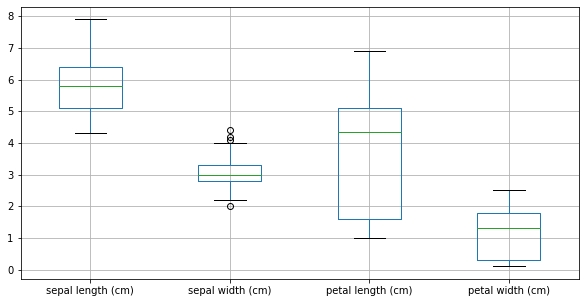

In [7]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

In [8]:
# some outliers could be seen in 'sepal width (cm)'

### Removing outliers using IQR

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(146, 4)

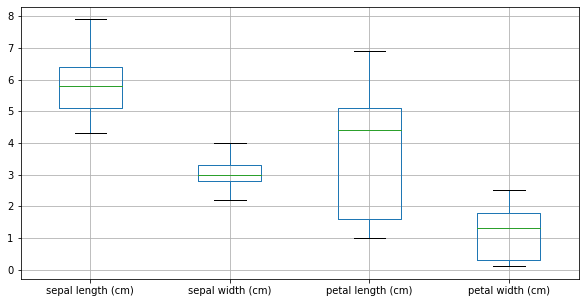

In [10]:
plt.figure(figsize=(10,5))
df1.boxplot()
plt.show()

# Splitting the dataset into train and test in a ratio of 70:30

In [11]:
X = df
y=iris.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [13]:
print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape : (105, 4)
X_test shape : (45, 4)
y_train shape : (105,)
y_test shape : (45,)


# Building the model

In [14]:
dtf = DecisionTreeClassifier()
dtf.fit(X_train , y_train)

DecisionTreeClassifier()

In [15]:
y_pred = dtf.predict(X_test)

In [16]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

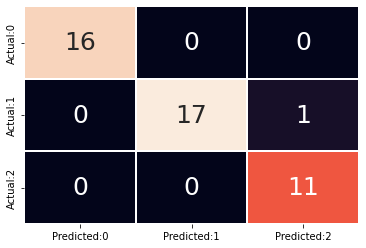

In [17]:
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], 
                           index = ['Actual:0','Actual:1','Actual:2'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.show()

# Decision Tree

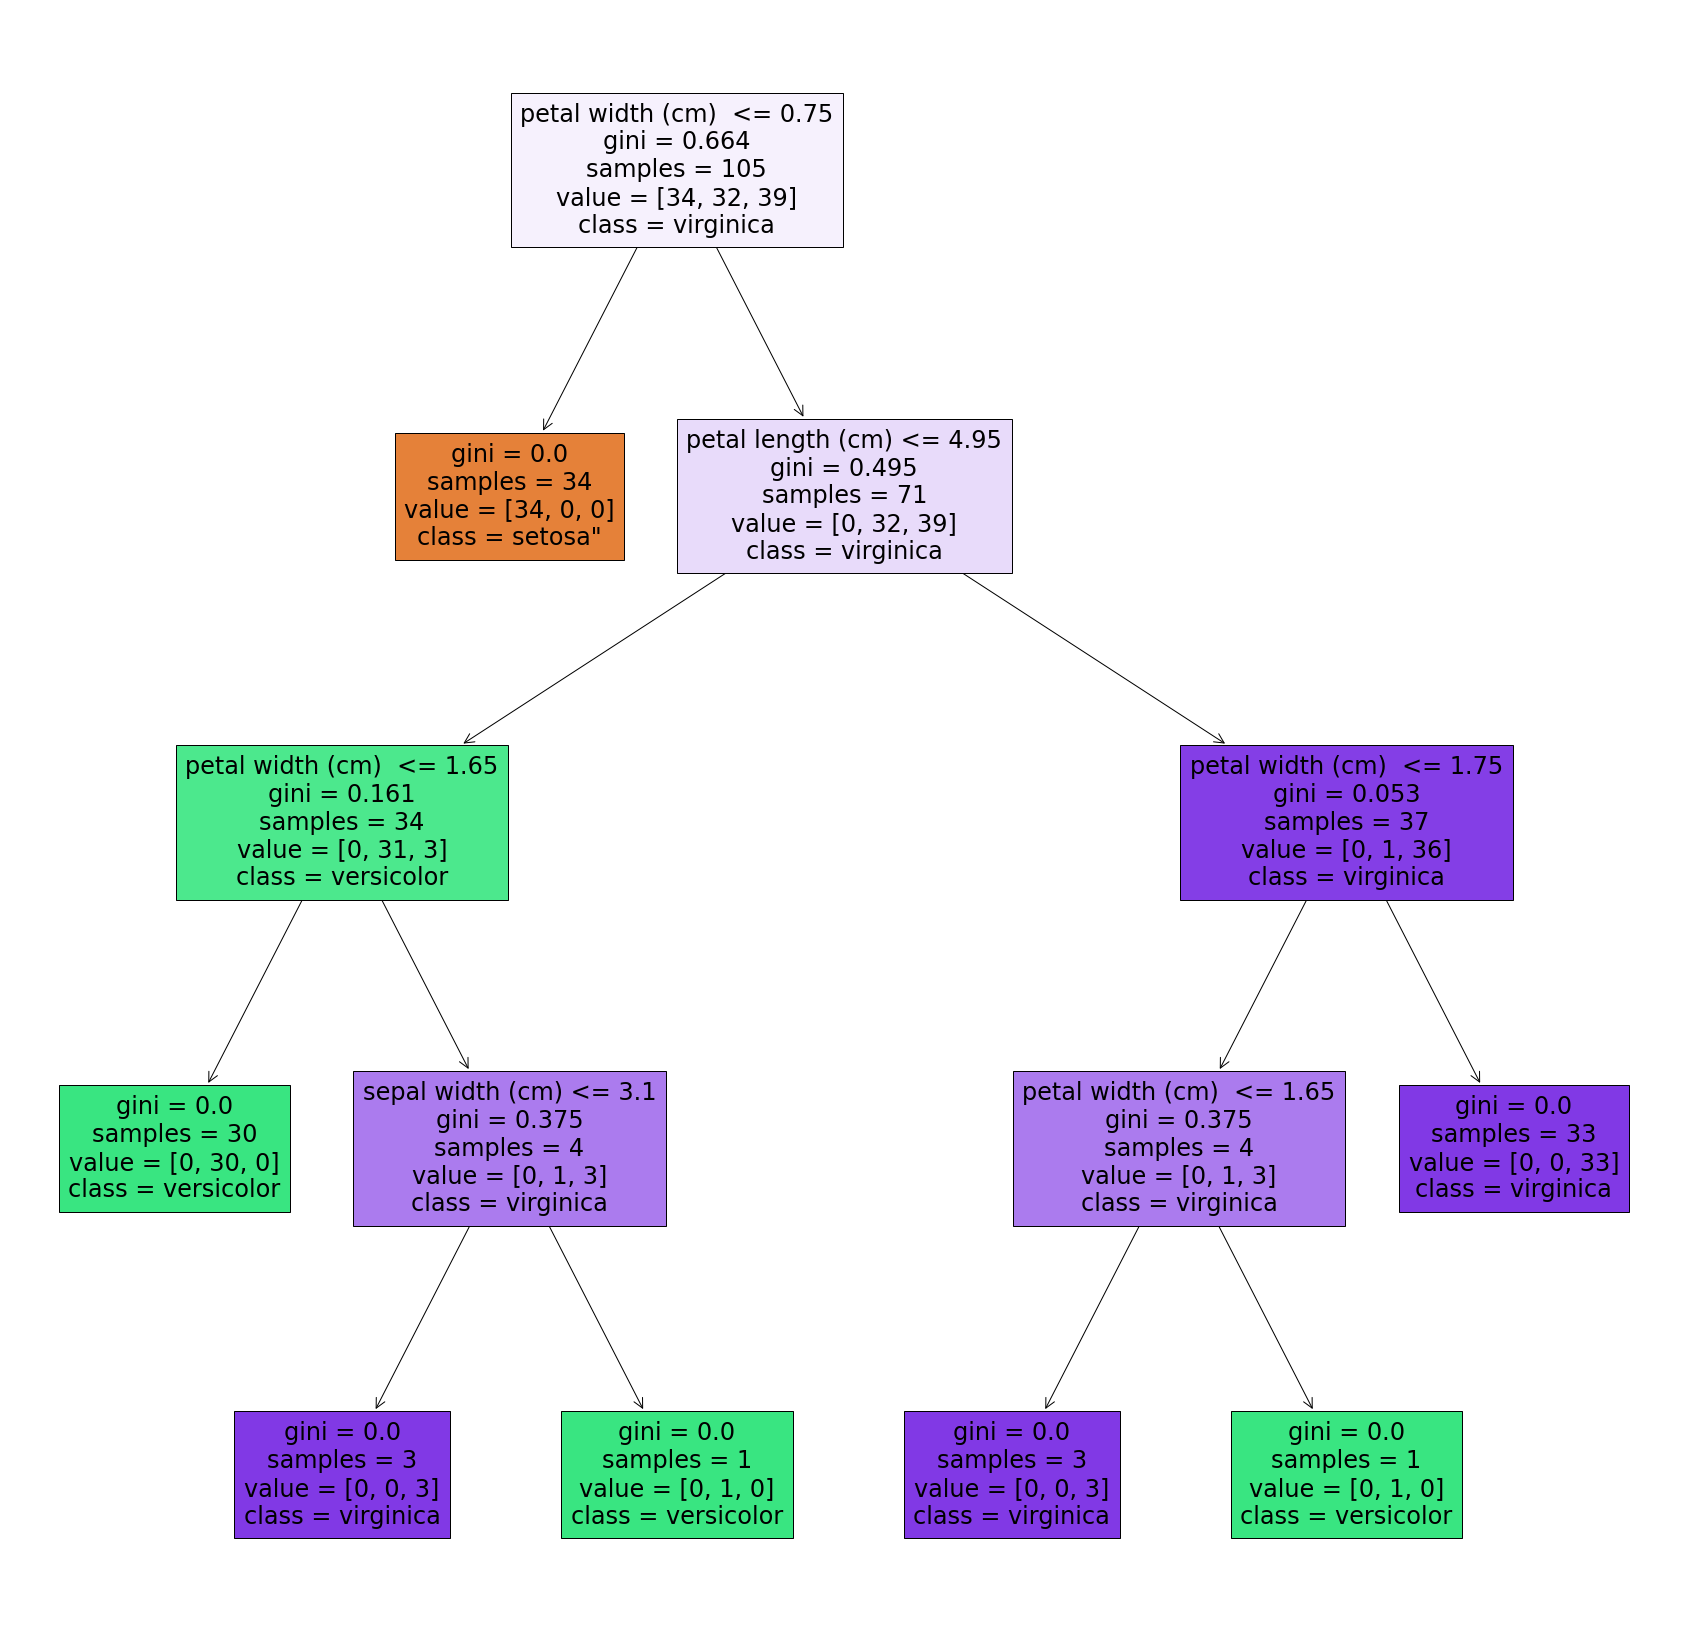

In [18]:
fn=[' sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm) ']
cn=['setosa"', 'versicolor' , 'virginica']
plt.figure (figsize= (30, 30))
tree.plot_tree(dtf, feature_names = fn, class_names = cn, filled = True);